In [47]:
import pandas as pd
import numpy as np
from scipy import stats

In [48]:
df=pd.read_csv('Assign2_data.csv')

In [49]:
df.head()

,Roll_No,First Name,Last Name,Gender,Age,Total Subjects,Sub1,Sub2,Sub3,Sub4,Percentage
0,1,Ethan,Smith,M,21,4,66.0,68.0,70.0,93.0,74.250000
1,2,Jacob,Johnson,M,20,4,90.0,78.0,61.0,69.0,74.500000
2,3,Logan,Williams,M,19,4,67.0,NaN,90.0,67.0,74.666667
3,4,Jack,Brown,M,21,4,10.0,64.0,69.0,72.0,53.750000
4,5,Emily,Jones,F,21,4,67.0,60.0,NaN,84.0,70.333333


In [50]:
df.isnull().sum().sort_values(ascending=False)

Sub2              9
Sub3              9
Sub1              6
Sub4              4
Roll_No           0
First Name        0
Last Name         0
Gender            0
Age               0
Total Subjects    0
Percentage        0
dtype: int64

In [51]:
df.describe()

,Roll_No,Age,Total Subjects,Sub1,Sub2,Sub3,Sub4,Percentage
count,98.000000,98.000000,98.0,92.00000,89.000000,89.000000,94.000000,98.000000
mean,49.500000,20.387755,4.0,75.75000,75.853933,75.764045,84.212766,78.018707
std,28.434134,1.475802,0.0,49.34597,26.742693,22.815476,101.838357,30.946267
min,1.000000,12.000000,4.0,-60.00000,-40.000000,-99.000000,-90.000000,29.000000
25%,25.250000,20.000000,4.0,65.00000,66.000000,68.000000,69.250000,71.500000
50%,49.500000,21.000000,4.0,72.00000,76.000000,79.000000,78.000000,76.250000
75%,73.750000,21.000000,4.0,83.50000,88.000000,89.000000,85.000000,80.312500
max,98.000000,22.000000,4.0,400.00000,250.000000,95.000000,1000.000000,313.500000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Roll_No         98 non-null     int64  
 1   First Name      98 non-null     object 
 2   Last Name       98 non-null     object 
 3   Gender          98 non-null     object 
 4   Age             98 non-null     int64  
 5   Total Subjects  98 non-null     int64  
 6   Sub1            92 non-null     float64
 7   Sub2            89 non-null     float64
 8   Sub3            89 non-null     float64
 9   Sub4            94 non-null     float64
 10  Percentage      98 non-null     float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ KB


In [53]:
pd.options.mode.chained_assignment = None
for i in range(df.shape[0]):
    if(df.Sub1[i]<0 or df.Sub1[i]>100):
        df.Sub1[i]=(np.nan)
    if(df.Sub2[i]<0 or df.Sub2[i]>100):
        df.Sub2[i]=(np.nan)
    if(df.Sub3[i]<0 or df.Sub3[i]>100):
        df.Sub3[i]=(np.nan)
    if(df.Sub4[i]<0 or df.Sub4[i]>100):
        df.Sub4[i]=(np.nan)

<AxesSubplot:>

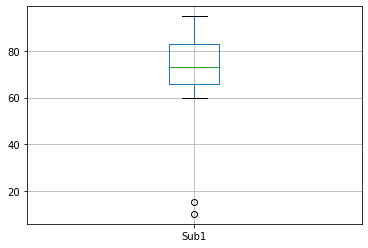

In [54]:
df.boxplot(column=['Sub1'],return_type='axes')

<AxesSubplot:>

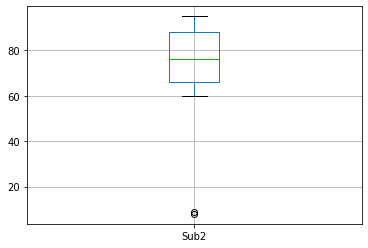

In [55]:
df.boxplot(column=['Sub2'],return_type='axes')

<AxesSubplot:>

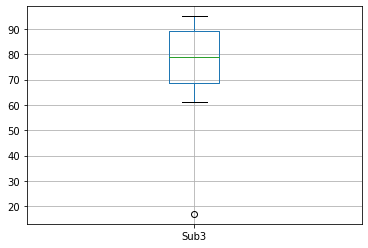

In [56]:
df.boxplot(column=['Sub3'],return_type='axes')

<AxesSubplot:>

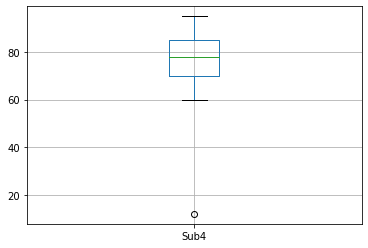

In [57]:
df.boxplot(column=['Sub4'],return_type='axes')

In [58]:
Q1=df['Sub1'].quantile(0.25)
Q3=df['Sub1'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker=Q1-1.5*IQR
median = df.loc[df['Sub1']>Lower_Whisker, 'Sub1'].median()
df['Sub1']=np.where(df['Sub1']<Lower_Whisker,median,df['Sub1'])

<AxesSubplot:>

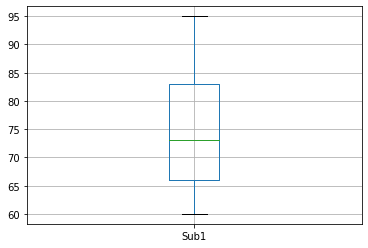

In [59]:
df.boxplot(column=['Sub1'],return_type='axes')

In [60]:
Q1=df['Sub2'].quantile(0.25)
Q3=df['Sub2'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker=Q1-1.5*IQR
median = df.loc[df['Sub2']>Lower_Whisker, 'Sub2'].median()
df['Sub2']=np.where(df['Sub2']<Lower_Whisker,median,df['Sub2'])

<AxesSubplot:>

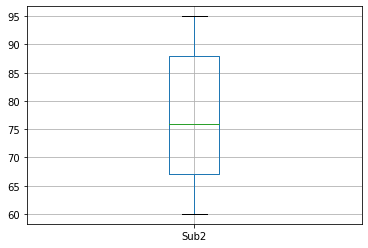

In [61]:
df.boxplot(column=['Sub2'],return_type='axes')

In [62]:
Q1=df['Sub3'].quantile(0.25)
Q3=df['Sub3'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker=Q1-1.5*IQR
median = df.loc[df['Sub3']>Lower_Whisker, 'Sub3'].median()
df['Sub3']=np.where(df['Sub3']<Lower_Whisker,median,df['Sub3'])

<AxesSubplot:>

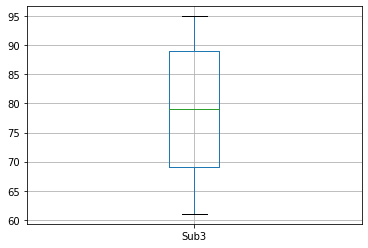

In [63]:
df.boxplot(column=['Sub3'],return_type='axes')

In [64]:
Q1=df['Sub4'].quantile(0.25)
Q3=df['Sub4'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker=Q1-1.5*IQR
median = df.loc[df['Sub4']>Lower_Whisker, 'Sub4'].median()
df['Sub4']=np.where(df['Sub4']<Lower_Whisker,median,df['Sub4'])

<AxesSubplot:>

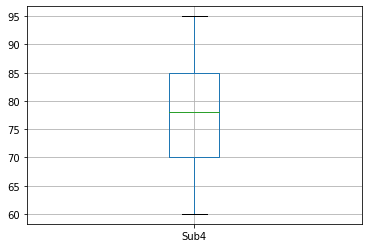

In [65]:
df.boxplot(column=['Sub4'],return_type='axes')

In [71]:
df['Sub1'].fillna((df['Sub1'].mean()),inplace=True)
df['Sub2'].fillna((df['Sub2'].mean()),inplace=True)
df['Sub3'].fillna((df['Sub3'].mean()),inplace=True)
df['Sub4'].fillna((df['Sub4'].mean()),inplace=True)

In [72]:
df['Percentage']=(df['Sub1']+df['Sub2']+df['Sub3']+df['Sub4'])/4

<AxesSubplot:>

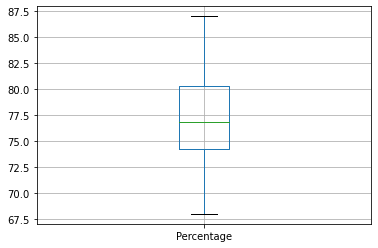

In [73]:
df.boxplot(column=['Percentage'],return_type='axes')

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols=['Sub1','Sub2','Sub3','Sub3']
scaler.fit(df[cols])
df[cols] = scaler.transform(df[cols])
df[cols].describe().loc[['min', 'max']]

,Sub1,Sub2,Sub3,Sub3
min,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0
